# Comparative Analysis of PCA, t-SNE, and UMAP

## Introduction

Dimensionality reduction is a crucial technique in data science and machine learning. This document compares three widely used algorithms:

* **PCA**: Principal Component Analysis
* **t-SNE**: t-distributed Stochastic Neighbor Embedding
* **UMAP**: Uniform Manifold Approximation and Projection

We will explore their **mathematical foundations**, **visual outputs**, and **pros and cons**.

---

## 1. Principal Component Analysis (PCA)

### Description

PCA is a linear dimensionality reduction method that projects data onto orthogonal components capturing the most variance.

### Mathematical Foundation

Let $X \in \mathbb{R}^{n \times d}$ be the data matrix.

1. Center the data:

   $$
   \tilde{X} = X - \mu, \quad \text{where } \mu = \frac{1}{n} \sum_{i=1}^{n} X_i
   $$

2. Compute the covariance matrix:

   $$
   \Sigma = \frac{1}{n} \tilde{X}^T \tilde{X}
   $$

3. Perform eigendecomposition:

   $$
   \Sigma v_i = \lambda_i v_i
   $$

   Retain the top $k$ eigenvectors $v_1, \ldots, v_k$.

4. Project:

   $$
   X_{\text{PCA}} = \tilde{X} V_k
   $$

### Pros and Cons

| Pros                       | Cons                         |
| -------------------------- | ---------------------------- |
| Fast, interpretable        | Linear only                  |
| Preserves global structure | Sensitive to feature scaling |

---

## 2. t-distributed Stochastic Neighbor Embedding (t-SNE)

### Description

t-SNE focuses on preserving **local structure** using a probabilistic model.

### Mathematical Foundation

Given pairwise distances $d_{ij}$ in high-dimensional space:

1. Compute conditional probabilities:

   $$
   p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
   $$

   Symmetrize:

   $$
   p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
   $$

2. Define low-dimensional similarities using Student t-distribution:

   $$
   q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
   $$

3. Minimize the Kullback–Leibler divergence:

   $$
   KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
   $$

### Pros and Cons

| Pros                         | Cons                                  |
| ---------------------------- | ------------------------------------- |
| Excellent cluster separation | Poor global structure                 |
| Captures local neighborhoods | Slow on large datasets                |
| Visual appeal                | Non-parametric (no inverse transform) |

---

## 3. Uniform Manifold Approximation and Projection (UMAP)

### Description

UMAP builds on manifold learning, constructing a topological representation of data using graphs.

### Mathematical Foundation

1. Build a weighted k-NN graph with probabilities:

   $$
   p_{ij} = \exp\left( -\frac{(d(x_i, x_j) - \rho_i)}{\sigma_i} \right)
   $$

2. Construct a fuzzy simplicial set in high and low dimensions.

3. Minimize cross-entropy between fuzzy sets:

   $$
   C = \sum_{(i,j)} p_{ij} \log \frac{p_{ij}}{q_{ij}} + (1 - p_{ij}) \log \frac{1 - p_{ij}}{1 - q_{ij}}
   $$

Where $q_{ij}$ is a similar fuzzy probability in low dimensions.

### Pros and Cons

| Pros                        | Cons                         |
| --------------------------- | ---------------------------- |
| Fast and scalable           | Sensitive to hyperparameters |
| Retains global + local info | Can distort distances        |
| Can transform new points    | More complex implementation  |

## Conclusion

| Method | Local Structure | Global Structure | Transform New Data | Speed | Use Cases                    |
| ------ | --------------- | ---------------- | ------------------ | ----- | ---------------------------- |
| PCA    | ❌               | ✅                | ✅                  | ✅     | Preprocessing                |
| t-SNE  | ✅               | ❌                | ❌                  | ❌     | Visualization                |
| UMAP   | ✅               | ✅ (partial)      | ✅                  | ✅     | Visualization, preprocessing |

---

/Users/robed/Documents/compass-consulting/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/robed/Documents/compass-consulting/.conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robed/Documents/compass-consulting/.conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


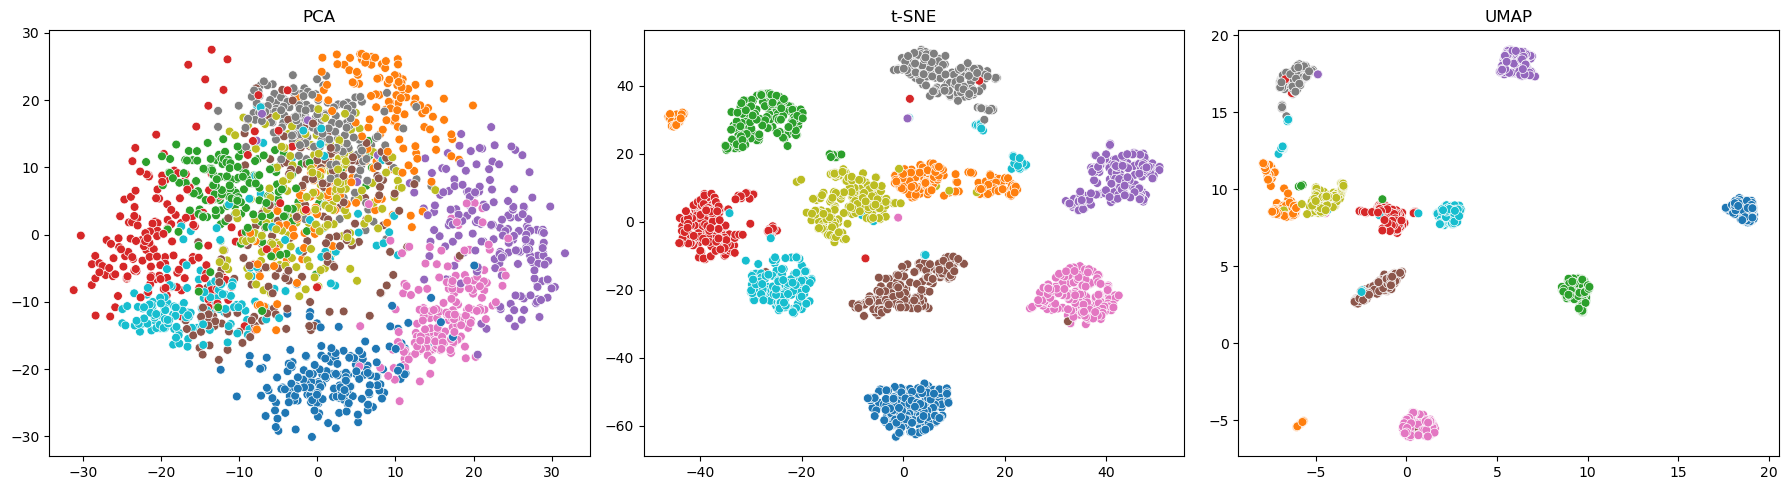

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Load dataset: 8x8 images of digits (64-dimensional)
digits = load_digits()
X = digits.data
y = digits.target

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plotting
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=40, legend=None)
plt.title('PCA')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', s=40, legend=None)
plt.title('t-SNE')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='tab10', s=40, legend=None)
plt.title('UMAP')

plt.tight_layout()
plt.show()


### **Introduction to Dimensionality Reduction**

**Objective:**
Visualize high-dimensional data (64 features) in 2D using three techniques:

* **PCA (Principal Component Analysis)**
* **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
* **UMAP (Uniform Manifold Approximation and Projection)**

**Dataset:**

* `load_digits()` from `sklearn.datasets`
* Contains 1,797 images of handwritten digits (0–9), each an 8x8 image (64-dimensional).

---

### **PCA (Principal Component Analysis)**

**Method:**

* Linear transformation.
* Projects data onto directions (principal components) that maximize variance.

**Output Characteristics:**

* Fast and deterministic.
* Captures global structure.
* Often useful as a preprocessing step.

**Visualization Insight:**

* Clear clusters, but overlap exists.
* Not ideal for preserving local relationships.

---

### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**

**Method:**

* Non-linear technique.
* Focuses on preserving **local similarity**.
* Computes probabilities of similarity and minimizes divergence between high and low-dimensional spaces.

**Output Characteristics:**

* More separation between digit clusters.
* Computationally intensive.
* Results can vary between runs (stochastic).

**Visualization Insight:**

* Better at separating digit classes than PCA.
* More expressive for local neighborhood structures.

---

### **UMAP (Uniform Manifold Approximation and Projection)**

**Method:**

* Non-linear dimensionality reduction.
* Preserves both local and some global structures.
* Based on manifold learning and nearest-neighbor graphs.

**Output Characteristics:**

* Faster than t-SNE.
* More consistent than t-SNE across runs.
* Preserves more of the data's structure.

**Visualization Insight:**

* Strong separation between digit classes.
* Compact clusters with meaningful relationships.

---

### **Combined Visualization**

**Graph Summary:**

* **Left:** PCA – global structure, overlaps.
* **Middle:** t-SNE – excellent local clustering.
* **Right:** UMAP – good balance of local/global, fast and accurate.

**Conclusion:**

* **PCA:** Good first step, linear.
* **t-SNE:** Great local structure, slower.
* **UMAP:** Best of both worlds – speed and clarity.
